### **How this works**

* **The Dataset:** Ultralytics hosts a dataset called `dog-pose`. It contains ~6,000 images of dogs with 24 keypoints (legs, tail, ears, etc.) already labeled.
* **The Config:** The file `dog-pose.yaml` is built-in to the `ultralytics` library. You don't even need to download it manually; YOLOv8 knows where to find it.
* **The Download:** When you run the training command, YOLO detects you don't have the data, **automatically downloads** the 300MB zip file, unzips it, and starts training.

---

# 🐶 Dog Pose Dataset Info

**Source:** [Ultralytics Dog-Pose](https://docs.ultralytics.com/datasets/pose/dog-pose/)

**What is it?**

A pre-prepared dataset containing:

- **6,773 training images**
    
- **1,703 validation images**
    
- **24 Keypoints per dog** (e.g., Left Ear, Right Ear, Tail Start, Tail End, Paws, Knees, etc.)
    

**How it works:**

We do not need to download a zip file manually. The command `data='dog-pose.yaml'` tells YOLOv8 to:

1. Look up the dataset URL from the Ultralytics GitHub repo.
    
2. Download the images and labels automatically to your Colab environment.
    
3. Start training immediately.
    

**YOLO Pose Label Format:**

The labels are `.txt` files where each line looks like this:

```
<class-index> <x> <y> <w> <h> <px1> <py1> <v1> <px2> <py2> <v2> ...
```

- `class-index`: 0 (for Dog)
    
- `x, y, w, h`: Bounding Box Center X, Center Y, Width, Height (Normalized 0-1)
    
- `px, py`: Keypoint X, Keypoint Y (Normalized 0-1)
    
- `v`: Visibility (2=Visible, 1=Occluded, 0=Not labeled)
    

### **Install & Setup**

In [3]:
# 1. Install Ultralytics (YOLOv8) and other tools
!pip install ultralytics -q

from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os
import urllib.request

# Fix for displaying plots in Colab
%matplotlib inline

print("✅ Setup Complete! Ready to train.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 76.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ Setup Complete! Ready to train.


### **Train the Model**

In [2]:
# 2. Train the Model
# We use 'yolov8n-pose.pt' (Nano) which is pre-trained on Humans.
# We fine-tune it on 'dog-pose.yaml'.
# The dataset will download AUTOMATICALLY when you run this.

print("🚀 Starting Training... (Note: The first time, it will download ~300MB of data)")

model = YOLO('yolov8n-pose.pt')

results = model.train(
    data='dog-pose.yaml',  # <--- This triggers the automatic download!
    epochs=10,             # 10 is enough for a test. Use 50-100 for a pro model.
    imgsz=640,
    batch=16,
    project='/content/runs/pose',
    name='dog_pose_model'
)

print("✅ Training Complete!")

🚀 Starting Training... (Note: The first time, it will download ~300MB of data)
Ultralytics 8.4.11 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dog-pose.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-pose.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=dog_pose_model, nbs=64, nms=False, opset=None, 

A Note on the "Warning"
You might see this yellow warning in your logs: WARNING ⚠️ No 'flip_idx' array defined in data.yaml, disabling 'fliplr' and 'flipud' augmentations.

Don't Panic: This is NOT an error. It will not stop your training.

What it means: It just means the automatic dataset config didn't specify which body parts swap when an image is mirrored (e.g., Left Ear ↔ Right Ear).

Consequence: YOLO will simply turn off "mirroring" data augmentation to be safe. Your model will still train fine, just maybe slightly less robust to mirrored images. You can safely ignore this for now.

Next Step: Just wait for it to reach 10/10 epochs, and then run the next cell to test it! 🍵

### **Run Inference (Test it)**

# **Process dog video**

### SETUP


In [6]:
from google.colab import files

video_path = "/content/dog_video.mp4"

# Load the Dog Pose model we just trained
model_path = '/content/best_dogs.pt'


### RUN VIDEO INFERENCE


In [7]:
print(f"🎥 Processing video: {video_path}...")

model = YOLO(model_path)
# Run prediction
results = model.predict(
    source=video_path,
    save=True,                 # Save the output video
    project='/content/inference_video',
    name='dog_result',
    conf=0.5,                  # Confidence threshold
    exist_ok=True
)

🎥 Processing video: /content/dog_video.mp4...

WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/751) /content/dog_video.mp4: 384x640 1 dog, 76.5ms
video 1/1 (frame 2/751) /content/dog_video.mp4: 384x640 1 dog, 10.8ms
video 1/1 (frame 3/751) /content/dog_video.mp4: 384x640 1 dog, 10.2ms
video 1/1 (frame 4/751) /content/dog_video.mp4: 384x640 1 dog, 10.5ms
video 1/1 (frame 5/751) /content/dog_video.mp4: 384x640 1 dog, 10.5ms
video 1/1 (frame 6/751) /content/dog_video.mp4: 384x640 1 dog,

### DOWNLOAD RESULT

In [8]:
# YOLO creates a new folder for the result
save_dir = results[0].save_dir

# Find the output file (YOLO often converts to .avi or .mp4)
output_files = os.listdir(save_dir)

if output_files:
    output_video = os.path.join(save_dir, output_files[0])
    print(f"✅ Done! Saved to: {output_video}")

    # Trigger download to your local PC
    print("⬇️ Downloading processed video...")
    files.download(output_video)
else:
    print("⚠️ Video processed, but output file not found in folder.")

✅ Done! Saved to: /content/inference_video/dog_result/dog_video.avi
⬇️ Downloading processed video...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<img src="output_videos/dog_image_output.png.png" alt="dog output" width="800">


image 1/1 /content/test_dog.jpg: 640x480 1 dog, 68.6ms
Speed: 3.3ms preprocess, 68.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


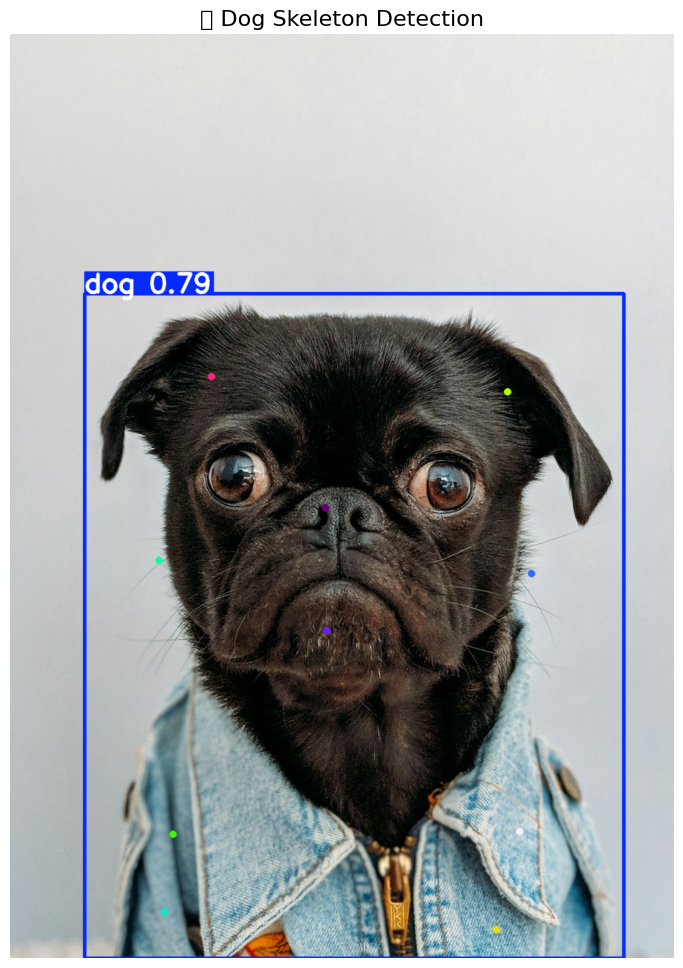

In [3]:
# 3. Test on a Sample Dog Image
# We will download a random dog image from the web to test our new brain.

# URL of a dog running (good for showing skeleton)
img_url = "https://images.unsplash.com/photo-1518020382113-a7e8fc38eac9?q=80&w=1000&auto=format&fit=crop"
img_path = "test_dog.jpg"

if not os.path.exists(img_path):
    urllib.request.urlretrieve(img_url, img_path)

# Load the best model we just trained
# (Note: path might vary slightly if you trained multiple times, check folder on left)
best_model_path = '/content/runs/pose/dog_pose_model/weights/best.pt'
model = YOLO(best_model_path)

# Run Inference
results = model(img_path)

# Plot Results
# This draws the skeleton and bounding box
res_plotted = results[0].plot()

# Show Image
plt.figure(figsize=(12, 12))
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("🐶 Dog Skeleton Detection", fontsize=16)
plt.show()

### **Download The Model**

In [4]:
# 4. Download the trained model to your PC
from google.colab import files

print(f"⬇️ Downloading model from: {best_model_path}")
files.download(best_model_path)

⬇️ Downloading model from: /content/runs/pose/dog_pose_model/weights/best.pt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>